In [335]:
#im = Image.open('OAS1_0001_MR1_mpr_n4_anon_sbj_111_sag_88.gif')
#rgb_im = im.convert('RGB')
#rgb_im.save('colors.jpg')

In [1]:
import random
import numpy as np
from sklearn.linear_model import LinearRegression
from matplotlib.pyplot import imread
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib
from sklearn.ensemble import RandomForestClassifier
import scipy
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import os
import seaborn as sns
import keras
import tensorflow
from keras.models import Sequential, load_model, Model
from keras.layers import Dense, Activation, Dropout, Input
from keras.activations import elu
from keras.initializers import he_normal
from keras.utils import np_utils
from numpy.testing import assert_allclose
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers.normalization import BatchNormalization
from keras import backend as K
from nibabel.testing import data_path
import nibabel as nib
from nilearn import plotting
from nilearn import image
import nilearn
from sklearn.tree import DecisionTreeClassifier
from nilearn import image
from keras.preprocessing import image

/Users/glynismattheisen/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
/Users/glynismattheisen/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/glynismattheisen/anaconda3/lib/python3.6/site-packages/dicom/__init__.py:53: UserWarning: 
This code is using an older version of pydicom, which is no longer 
maintained as of Jan 2017.  You can access the new pydicom features and API 
by installing `pydicom` from PyPI.
See 'Transitioning to pydicom 1.x' section at pydicom.readthedocs.org 
for mo

<b>Subject.ID</b><br>
<b>MRI.ID</b><br>
<b>Group</b> (Converted / Demented / Nondemented)<br>
<b>MR.Delay ???</b><br><br>
<b>Demographics Info</b><br>
<b>M.F</b> - Gender<br>
<b>Age</b><br>
<b>EDUC</b> - Years of education<br>
<b>SES</b> - Socioeconomic status as assessed by the Hollingshead Index of Social Position and classified into categories from 1 (highest status) to 5 (lowest status)<br><br>
<b>Clinical Info</b><br>
<b>MMSE</b> - Mini-Mental State Examination score (range is from 0 = worst to 30 = best)<br>
<b>CDR</b> - Clinical Dementia Rating (0 = no dementia, 0.5 = very mild AD, 1 = mild AD, 2 = moderate AD)<br><br>
<b>Derived anatomic volumes</b><br>
<b>eTIV</b> - Estimated total intracranial volume, mm3<br>
<b>nWBV</b> - Normalized whole-brain volume, expressed as a percent of all voxels in the atlas-masked image that are labeled as gray or white matter by the automated tissue segmentation process<br>
<b>ASF</b> - Atlas scaling factor (unitless). Computed scaling factor that transforms native-space brain and skull to the atlas target (i.e., the determinant of the transform matrix)<br>

In [2]:
cd  /Users/glynismattheisen/Desktop/Final

/Users/glynismattheisen/Desktop/Final


In [3]:
df = pd.read_csv('oasis_longitudinal.csv')
df.head(10)

Subject ID         MRI ID        Group  Visit  MR Delay M/F Hand  Age  EDUC  \
0  OAS2_0001  OAS2_0001_MR1  Nondemented      1         0   M    R   87    14   
1  OAS2_0001  OAS2_0001_MR2  Nondemented      2       457   M    R   88    14   
2  OAS2_0002  OAS2_0002_MR1     Demented      1         0   M    R   75    12   
3  OAS2_0002  OAS2_0002_MR2     Demented      2       560   M    R   76    12   
4  OAS2_0002  OAS2_0002_MR3     Demented      3      1895   M    R   80    12   
5  OAS2_0004  OAS2_0004_MR1  Nondemented      1         0   F    R   88    18   
6  OAS2_0004  OAS2_0004_MR2  Nondemented      2       538   F    R   90    18   
7  OAS2_0005  OAS2_0005_MR1  Nondemented      1         0   M    R   80    12   
8  OAS2_0005  OAS2_0005_MR2  Nondemented      2      1010   M    R   83    12   
9  OAS2_0005  OAS2_0005_MR3  Nondemented      3      1603   M    R   85    12   

   SES  MMSE  CDR  eTIV   nWBV    ASF  
0  2.0  27.0  0.0  1987  0.696  0.883  
1  2.0  30.0  0.0  2004  0.681  0.876  
2  NaN  23.0  0.5  1678  0.736  1.046  
3  NaN  28.0  0.5  1738  0.713  1.010  
4  NaN  22.0  0.5  1698  0.701  1.034  
5  3.0  28.0  0.0  1215  0.710  1.444  
6  3.0  27.0  0.0  1200  0.718  1.462  
7  4.0  28.0  0.0  1689  0.712  1.039  
8  4.0  29.0  0.5  1701  0.711  1.032  
9  4.0  30.0  0.0  1699  0.705  1.033

In [4]:
df[df['Subject ID']=='OAS2_0001']

Subject ID         MRI ID        Group  Visit  MR Delay M/F Hand  Age  EDUC  \
0  OAS2_0001  OAS2_0001_MR1  Nondemented      1         0   M    R   87    14   
1  OAS2_0001  OAS2_0001_MR2  Nondemented      2       457   M    R   88    14   

   SES  MMSE  CDR  eTIV   nWBV    ASF  
0  2.0  27.0  0.0  1987  0.696  0.883  
1  2.0  30.0  0.0  2004  0.681  0.876

In [5]:
df[df['Subject ID']=='OAS2_0001']

Subject ID         MRI ID        Group  Visit  MR Delay M/F Hand  Age  EDUC  \
0  OAS2_0001  OAS2_0001_MR1  Nondemented      1         0   M    R   87    14   
1  OAS2_0001  OAS2_0001_MR2  Nondemented      2       457   M    R   88    14   

   SES  MMSE  CDR  eTIV   nWBV    ASF  
0  2.0  27.0  0.0  1987  0.696  0.883  
1  2.0  30.0  0.0  2004  0.681  0.876

In [6]:
del df['Hand']

In [7]:
# Identify percentage of each categories composed of missing values
total = df.isnull().sum().sort_values(ascending=False)
percent = df.isnull().sum()/df.isnull().count()*100
missing_data = pd.concat([total, percent], axis=1, keys=['Total', '%'],sort=True)
missing_data

Total         %
ASF             0  0.000000
Age             0  0.000000
CDR             0  0.000000
EDUC            0  0.000000
Group           0  0.000000
M/F             0  0.000000
MMSE            2  0.536193
MR Delay        0  0.000000
MRI ID          0  0.000000
SES            19  5.093834
Subject ID      0  0.000000
Visit           0  0.000000
eTIV            0  0.000000
nWBV            0  0.000000

In [8]:
# Fill in missing SES values with mean
mean = df['SES'].mean()
std = df['SES'].std()
is_null = df['SES'].isnull().sum()
rand_SES = np.random.randint(mean - std, mean + std, size = is_null)
SES_slice = df["SES"].copy()
SES_slice[np.isnan(SES_slice)] = rand_SES
df["SES"] = SES_slice
df["SES"] = df["SES"].astype(int)

In [9]:
#confirm null values count = 0
df["SES"].isnull().sum()

0

In [10]:
# Fill in missing MMSE values with mean
mean = df['MMSE'].mean()
std = df['MMSE'].std()
is_null = df['MMSE'].isnull().sum()
rand_MMSE = np.random.randint(mean - std, mean + std, size = is_null)
MMSE_slice = df['MMSE'].copy()
MMSE_slice[np.isnan(MMSE_slice)] = rand_MMSE
df['MMSE'] = MMSE_slice
df['MMSE'] = df['MMSE'].astype(int)

In [11]:
#confirm null values count = 0
df["MMSE"].isnull().sum()

0

In [12]:
#replace male == 0 and female == 1
genders = {"M": 0, "F": 1}
df['M/F'] = df['M/F'].map(genders)

In [13]:
# Look for correlations
corr = df.corr(method= 'pearson')
corr

Visit  MR Delay       M/F       Age      EDUC       SES  \
Visit     1.000000  0.920009 -0.069791  0.183213  0.024615 -0.048158   
MR Delay  0.920009  1.000000 -0.048006  0.205357  0.051630 -0.021048   
M/F      -0.069791 -0.048006  1.000000  0.037726 -0.089279  0.042995   
Age       0.183213  0.205357  0.037726  1.000000 -0.027886 -0.043499   
EDUC      0.024615  0.051630 -0.089279 -0.027886  1.000000 -0.669836   
SES      -0.048158 -0.021048  0.042995 -0.043499 -0.669836  1.000000   
MMSE     -0.029935  0.064766  0.167207  0.055048  0.193414 -0.137111   
CDR       0.002325 -0.062915 -0.202140 -0.026257 -0.153121  0.032678   
eTIV      0.117428  0.119624 -0.572549  0.042348  0.257015 -0.231056   
nWBV     -0.126682 -0.105586  0.249618 -0.518359 -0.012200  0.094937   
ASF      -0.120399 -0.123545  0.561647 -0.035067 -0.241752  0.221570   

              MMSE       CDR      eTIV      nWBV       ASF  
Visit    -0.029935  0.002325  0.117428 -0.126682 -0.120399  
MR Delay  0.064766 -0.062915  0.119624 -0.105586 -0.123545  
M/F       0.167207 -0.202140 -0.572549  0.249618  0.561647  
Age       0.055048 -0.026257  0.042348 -0.518359 -0.035067  
EDUC      0.193414 -0.153121  0.257015 -0.012200 -0.241752  
SES      -0.137111  0.032678 -0.231056  0.094937  0.221570  
MMSE      1.000000 -0.677417 -0.033448  0.342115  0.041487  
CDR      -0.677417  1.000000  0.022819 -0.344819 -0.029340  
eTIV     -0.033448  0.022819  1.000000 -0.210122 -0.988877  
nWBV      0.342115 -0.344819 -0.210122  1.000000  0.213476  
ASF       0.041487 -0.029340 -0.988877  0.213476  1.000000

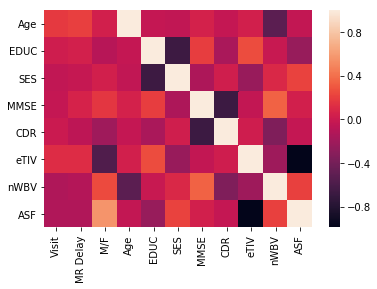

In [14]:
sns.heatmap(corr['Age':'ASF'])
plt.show()

In [15]:
color_list = ['red' if i== 'Demented' else 'blue' for i in df.loc[:,'Group']]

In [16]:
column_sel = ['Age','SES','MMSE','CDR','eTIV','ASF','EDUC','M/F','nWBV']

In [17]:
short = df.copy()

In [18]:
del short['Subject ID']
del short ['MRI ID']
del short ['Visit']
del short ['MR Delay']

In [19]:
short.head(2)

Group  M/F  Age  EDUC  SES  MMSE  CDR  eTIV   nWBV    ASF
0  Nondemented    0   87    14    2    27  0.0  1987  0.696  0.883
1  Nondemented    0   88    14    2    30  0.0  2004  0.681  0.876

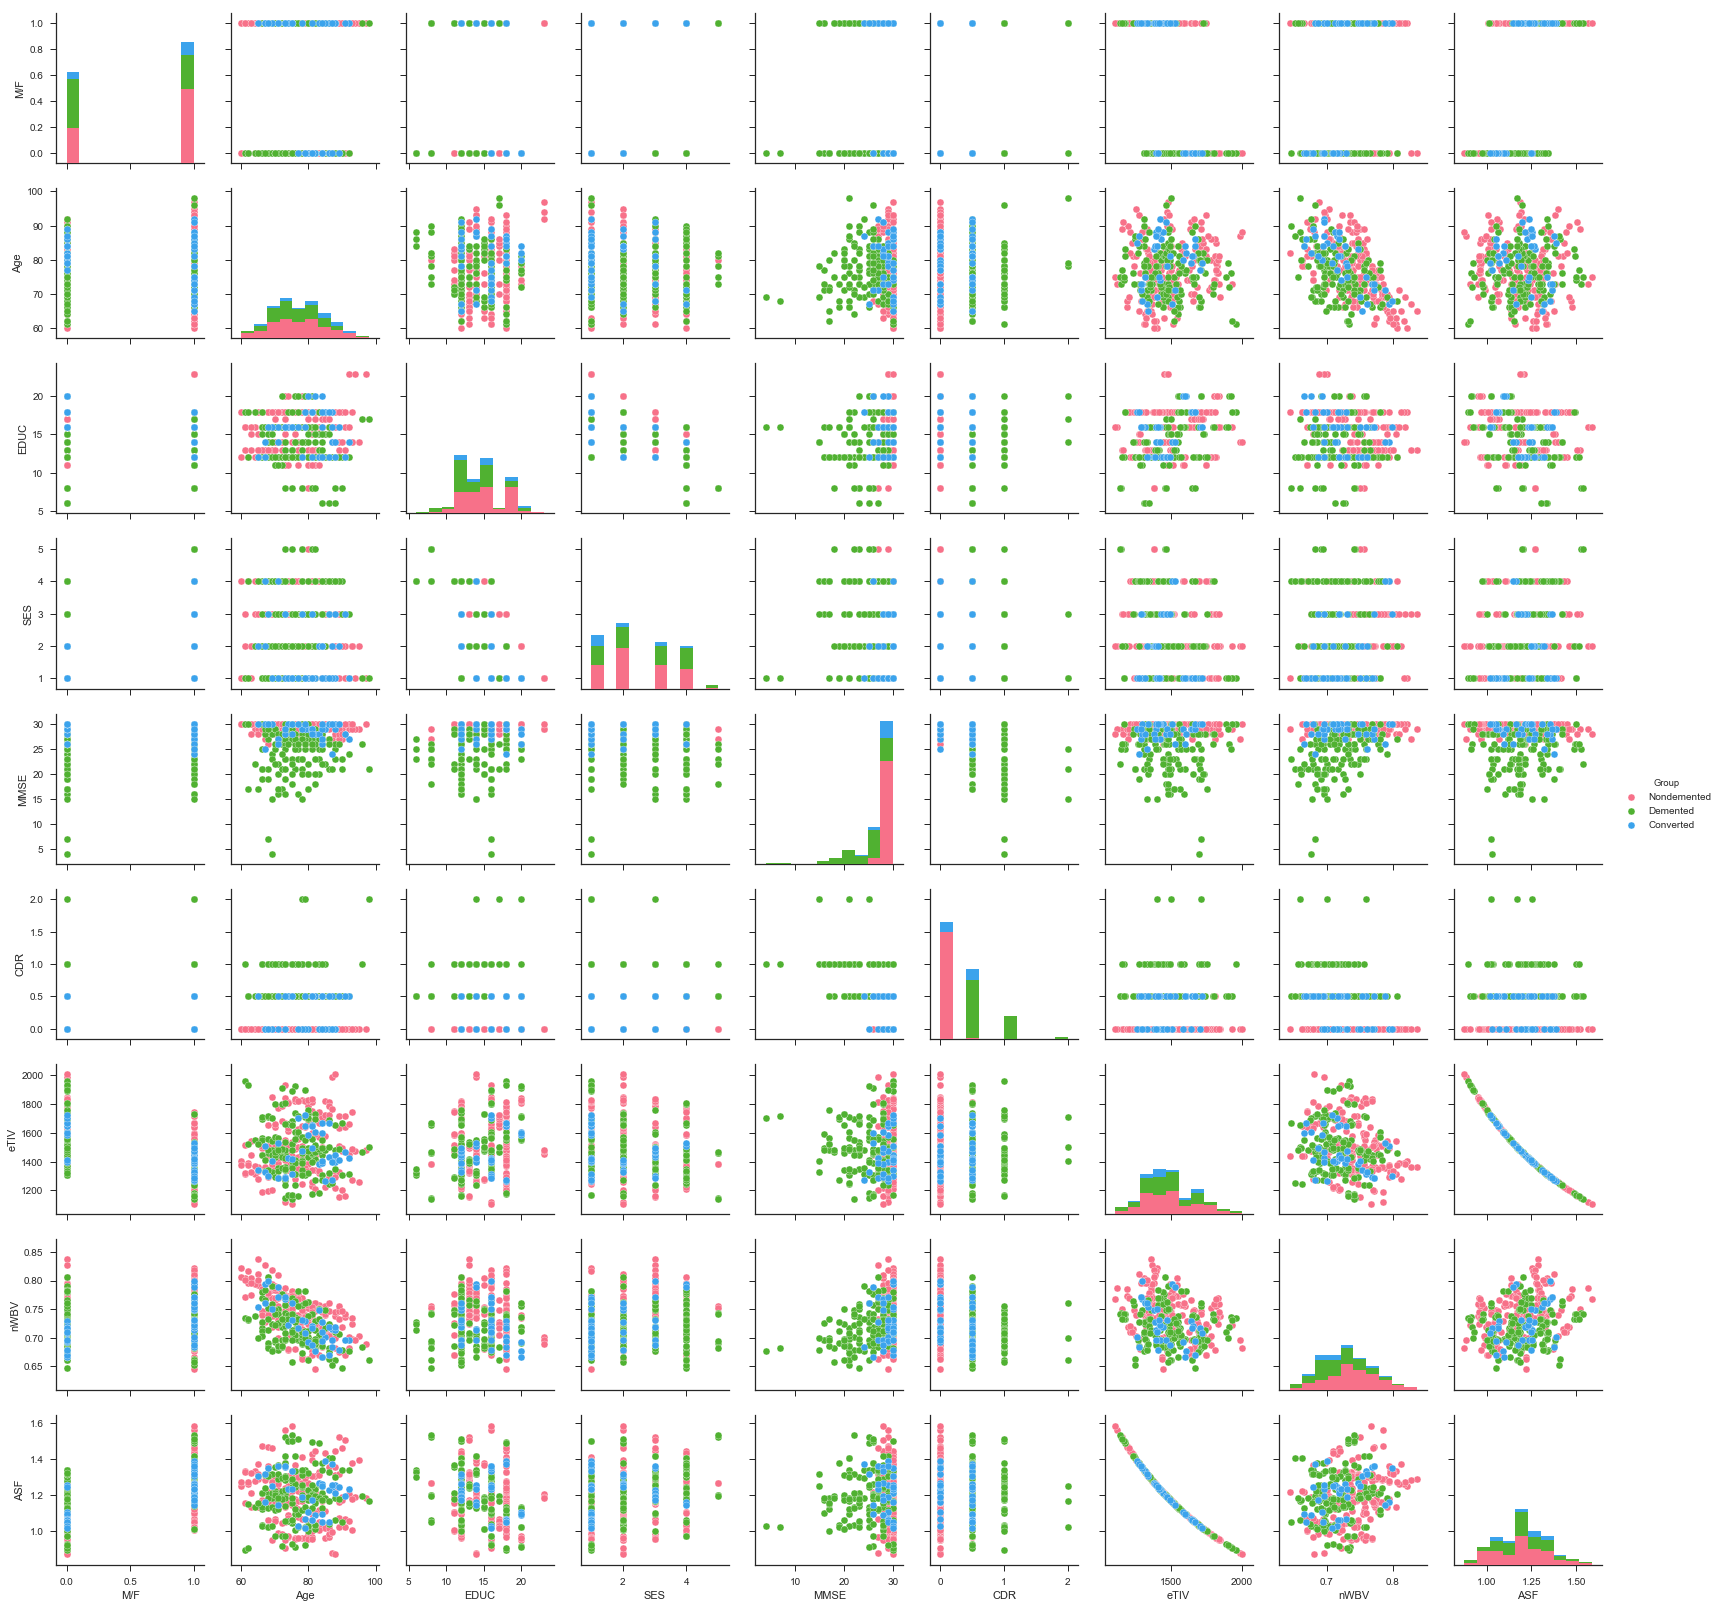

In [20]:
sns.set(style="ticks")
sns.pairplot(short,hue='Group',palette="husl")
plt.show()

In [21]:
shorter = short.copy()
del shorter['CDR']
del shorter['MMSE']

In [22]:
shorter.head(2)

Group  M/F  Age  EDUC  SES  eTIV   nWBV    ASF
0  Nondemented    0   87    14    2  1987  0.696  0.883
1  Nondemented    0   88    14    2  2004  0.681  0.876

In [23]:
X = shorter.drop("Group", axis=1)
y = shorter["Group"]

In [24]:
X.shape, y.shape

((373, 7), (373,))

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 43)
X_train.head(3)

M/F  Age  EDUC  SES  eTIV   nWBV    ASF
147    1   81    18    2  1470  0.687  1.194
176    0   69    15    2  1546  0.724  1.135
355    0   81    20    1  1556  0.691  1.128

In [26]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((279, 7), (94, 7), (279,), (94,))

In [27]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [28]:
print("Train score:", logreg.score(X_train, y_train) *100)
print("Test score:", logreg.score(X_test, y_test) *100)

Train score: 61.648745519713266
Test score: 58.51063829787234


In [29]:
# random forest

In [30]:
RanFor = RandomForestClassifier(max_depth = 2, n_estimators = 15)

In [31]:
RanFor.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [32]:
print ("Training score: " + str(RanFor.score(X_train,y_train)))
print ("Test score: " + str(RanFor.score(X_test,y_test)))

Training score: 0.6845878136200717
Test score: 0.5957446808510638


In [33]:
 from sklearn.model_selection import GridSearchCV

In [34]:
trees = [i for i in range(1,10)]
depths = [i for i in range(1,25)]

In [35]:
grid = GridSearchCV(RanFor, 
        param_grid={'n_estimators': trees, 'max_depth': depths},
        scoring='accuracy', 
        n_jobs=1,
        cv=5
        )

In [36]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [37]:
grid.best_score_, grid.best_params_

(0.7849462365591398, {'max_depth': 10, 'n_estimators': 9})

In [38]:
final_model = grid.best_estimator_
final_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=9, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [39]:
print ("Training score: " + str(final_model.score(X_train,y_train)))
print ("Test score: " + str(final_model.score(X_test,y_test)))

Training score: 0.989247311827957
Test score: 0.776595744680851


In [40]:
cd /Users/glynismattheisen/Desktop/Final/Disc1_Proc

/Users/glynismattheisen/Desktop/Final/Disc1_Proc


In [41]:
he = keras.initializers.he_normal(seed=None)

In [42]:
model = Sequential([
    Dense(100, input_shape=(784,), kernel_initializer=he),
    BatchNormalization(),
    Activation('elu'),
    Dropout(0.5),
    Dense(100),
    BatchNormalization(),
    Activation('elu'),
    Dropout(0.5),
    Dense(100),
    BatchNormalization(),
    Activation('elu'),
    Dropout(0.5),
    Dense(100),
    BatchNormalization(),
    Activation('elu'),
    Dropout(0.5),
    Dense(100),
    BatchNormalization(),
    Activation('elu'),
    Dropout(0.5),
    Dense(5),
    Activation('softmax'),
])

In [43]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [44]:
path = '/Users/glynismattheisen/Desktop/Final/Disc1_Proc'
file_list = os.listdir(path)

In [45]:
file_list.remove('.DS_Store')

In [46]:
from PIL import Image

In [47]:
file_list

['OAS1_0001_MR1_mpr_n4_anon_sbj_111_sag_88.gif',
 'OAS1_0006_MR1_mpr_n4_anon_sbj_111_sag_88.gif',
 'OAS1_0007_MR1_mpr_n3_anon_sbj_111_sag_88.gif',
 'OAS1_0005_MR1_mpr_n4_anon_sbj_111_sag_88.gif',
 'OAS1_0003_MR1_mpr_n4_anon_sbj_111_sag_88.gif',
 'OAS1_0004_MR1_mpr_n4_anon_sbj_111_sag_88.gif',
 'OAS1_0009_MR1_mpr_n4_anon_sbj_111_sag_88.gif',
 'OAS1_0002_MR1_mpr_n4_anon_sbj_111_sag_88.gif',
 'OAS1_0010_MR1_mpr_n4_anon_sbj_111_sag_88.gif']

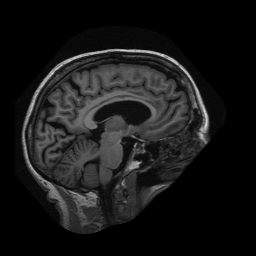

In [48]:
Image.open('/Users/glynismattheisen/Desktop/Final/Disc1_Proc/OAS1_0001_MR1_mpr_n4_anon_sbj_111_sag_88.gif')

In [49]:
pic_list = []
for i in file_list:
    pic_list.append(Image.open(i))

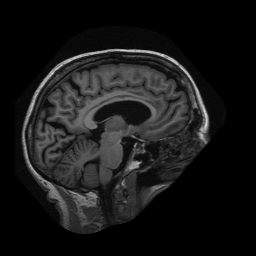

In [50]:
pic_list[0]

In [51]:
data_list = []
for i in file_list:
    data_list.append(plt.imread(i))

/Users/glynismattheisen/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:2152: ResourceWarning: unclosed file <_io.BufferedReader name='OAS1_0001_MR1_mpr_n4_anon_sbj_111_sag_88.gif'>
  return matplotlib.image.imread(fname, format)
/Users/glynismattheisen/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:2152: ResourceWarning: unclosed file <_io.BufferedReader name='OAS1_0006_MR1_mpr_n4_anon_sbj_111_sag_88.gif'>
  return matplotlib.image.imread(fname, format)
/Users/glynismattheisen/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:2152: ResourceWarning: unclosed file <_io.BufferedReader name='OAS1_0007_MR1_mpr_n3_anon_sbj_111_sag_88.gif'>
  return matplotlib.image.imread(fname, format)
/Users/glynismattheisen/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:2152: ResourceWarning: unclosed file <_io.BufferedReader name='OAS1_0005_MR1_mpr_n4_anon_sbj_111_sag_88.gif'>
  return matplotlib.image.imread(fname, format)
/Users/glynismattheisen/anaconda3/li

In [52]:
data_list

[array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
 

In [53]:
data_array = np.array(data_list)

In [54]:
data_array.shape

(9, 256, 256)

In [55]:
result = [0,1,0,1,0,0,0,1,0]
result = np.asarray(result)
result.shape

(9,)

In [56]:
x = data_array
y = result

In [57]:
x = x.reshape((9,256*256))

In [58]:
m_PCA = PCA(n_components=2)

In [59]:
m_PCA.fit(x)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [60]:
m_PCA.components_.shape

(2, 65536)

In [61]:
m_PCA.explained_variance_ratio_ # one number for every principle component

array([0.25218465, 0.16893248])

In [62]:
xt = m_PCA.transform(x)

In [63]:
xback = m_PCA.inverse_transform(xt)
xback.shape

(9, 65536)

In [64]:
xback = xback.reshape((9,256,256))

In [65]:
def draw(input):
    for i in range(8):
        plt.subplot(3, 3, i+1)
        plt.imshow(input[i], cmap=plt.cm.Greys)
        plt.axis('off')

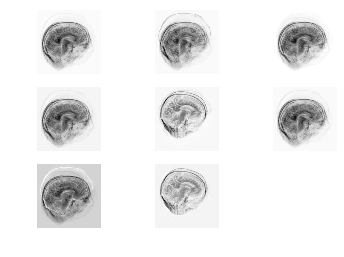

In [66]:
draw(xback)

# Decision Tree

In [67]:
DecTree = DecisionTreeClassifier(max_depth = 10)

DecTree.fit(x,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [68]:
print ("Training score: " + str(DecTree.score(x,y)))

Training score: 1.0


# Getting the images

In [75]:
ls

OAS1_0001_MR1_mpr_n4_anon_sbj_111_sag_88.gif
OAS1_0002_MR1_mpr_n4_anon_sbj_111_sag_88.gif
OAS1_0003_MR1_mpr_n4_anon_sbj_111_sag_88.gif
OAS1_0004_MR1_mpr_n4_anon_sbj_111_sag_88.gif
OAS1_0005_MR1_mpr_n4_anon_sbj_111_sag_88.gif
OAS1_0006_MR1_mpr_n4_anon_sbj_111_sag_88.gif
OAS1_0007_MR1_mpr_n3_anon_sbj_111_sag_88.gif
OAS1_0009_MR1_mpr_n4_anon_sbj_111_sag_88.gif
OAS1_0010_MR1_mpr_n4_anon_sbj_111_sag_88.gif


In [70]:
img = nib.load('anat1/sub-OAS30001_ses-d0129_acq-TSE_T2w.nii')
img2 = nib.load('anat2/sub-OAS30001_ses-d0129_run-01_T1w.nii')
img3 = nib.load('anat3/sub-OAS30001_ses-d0129_run-02_T1w.nii')
img4 = nib.load('anat4/sub-OAS30001_ses-d0129_T2w.nii')

FileNotFoundError: No such file or no access: 'anat1/sub-OAS30001_ses-d0129_acq-TSE_T2w.nii'

In [72]:
nilearn.plotting.plot_anat(img, title="plot_anat", cut_coords=(0,15,-25),dim=0)

NameError: name 'img' is not defined

In [73]:
nilearn.plotting.plot_anat(img2, title="plot_anat", cut_coords=(0,15,-25),dim=0)

NameError: name 'img2' is not defined

In [74]:
nilearn.plotting.plot_anat(img3, title="plot_anat", cut_coords=(0,15,-25),dim=0)

NameError: name 'img3' is not defined

In [511]:
file_list

['sub-OAS30001_ses-d0129_run-02_T1w(3) copy 11.png',
 'sub-OAS30001_ses-d0129_run-02_T1w(2) copy 16.png',
 'sub-OAS30001_ses-d0129_run-02_T1w(2) copy 17.png',
 'sub-OAS30001_ses-d0129_run-02_T1w(3) copy 10.png',
 'sub-OAS30001_ses-d0129_run-02_T1w(2) copy 8.png',
 'sub-OAS30001_ses-d0129_run-02_T1w(3) copy 12.png',
 'sub-OAS30001_ses-d0129_run-02_T1w(2) copy 15.png',
 'sub-OAS30001_ses-d0129_run-02_T1w copy 9.png',
 'sub-OAS30001_ses-d0129_run-02_T1w copy 8.png',
 'sub-OAS30001_ses-d0129_run-02_T1w(2) copy 14.png',
 'sub-OAS30001_ses-d0129_run-02_T1w(3) copy 13.png',
 'sub-OAS30001_ses-d0129_run-02_T1w(2) copy 9.png',
 'sub-OAS30001_ses-d0129_run-02_T1w(3) copy 17.png',
 'sub-OAS30001_ses-d0129_run-02_T1w(2) copy 10.png',
 'sub-OAS30001_ses-d0129_run-02_T1w(1) copy 18.png',
 'sub-OAS30001_ses-d0129_run-02_T1w(1) copy 19.png',
 'sub-OAS30001_ses-d0129_run-02_T1w(2) copy 11.png',
 'sub-OAS30001_ses-d0129_run-02_T1w(3) copy 16.png',
 'sub-OAS30001_ses-d0129_run-02_T1w(3) copy 14.png',
 's

In [514]:
cd Nifti_Conv

/Users/glynismattheisen/Desktop/Final/Nifti_Conv


In [515]:
path = '/Users/glynismattheisen/Desktop/Final/Nifti_Conv'
file_list = os.listdir(path)

In [516]:
brain_list = []
for i in file_list:
    brain_list.append(plt.imread(i))

In [517]:
brain_array = np.asarray(brain_list)

In [518]:
brain_array.shape

(80, 405, 342, 3)

In [519]:
brain = brain_array[:,:,:,0]

In [520]:
brain.shape

(80, 405, 342)

In [533]:
model = Sequential([
    Dense(10, input_shape=(138510,)),
    Activation('sigmoid'),
    Dense(10),
    Activation('sigmoid'),
    Dense(1),
    Activation('sigmoid'),
])

In [534]:
x = brain

In [523]:
xtrain = x.reshape((80,405*342))

In [524]:
y = [0,1,1,0]*20

In [525]:
y = np.asarray(y)

In [526]:
xtrain.shape

(80, 138510)

In [527]:
y.shape

(80,)

In [540]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [541]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_61 (Dense)             (None, 10)                1385110   
_________________________________________________________________
activation_61 (Activation)   (None, 10)                0         
_________________________________________________________________
dense_62 (Dense)             (None, 10)                110       
_________________________________________________________________
activation_62 (Activation)   (None, 10)                0         
_________________________________________________________________
dense_63 (Dense)             (None, 1)                 11        
_________________________________________________________________
activation_63 (Activation)   (None, 1)                 0         
Total params: 1,385,231
Trainable params: 1,385,231
Non-trainable params: 0
_________________________________________________________________


In [542]:
model.fit(xtrain,y,epochs=5, batch_size=5)

Epoch 1/5
80/80 [==============================] - 1s 8ms/step - loss: 0.7275 - acc: 0.5000
Epoch 2/5
80/80 [==============================] - 0s 3ms/step - loss: 0.7216 - acc: 0.5000
Epoch 3/5
80/80 [==============================] - 0s 3ms/step - loss: 0.7132 - acc: 0.5000
Epoch 4/5
80/80 [==============================] - 0s 2ms/step - loss: 0.7079 - acc: 0.5000
Epoch 5/5
80/80 [==============================] - 0s 3ms/step - loss: 0.7044 - acc: 0.5000


# nilearn

In [ ]:
from nilearn import plotting
from nilearn.regions import connected_label_regions

In [96]:
# fetch yeo atlas 
yeo = nilearn.datasets.fetch_atlas_yeo_2011()
atlas_yeo = yeo.thick_7

/Users/glynismattheisen/anaconda3/lib/python3.6/site-packages/scipy/ndimage/measurements.py:272: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  return _nd_image.find_objects(input, max_label)


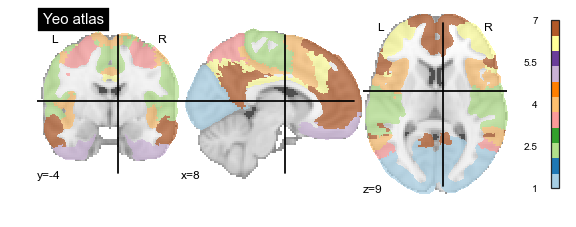

In [91]:
# plot the atlas for labeling brain regions based on functional connectivity
plotting.plot_roi(atlas_yeo, title='Yeo atlas',
                  cut_coords=(8, -4, 9), colorbar=True, cmap='Paired')
# default, 7 labels corresponding to different networks

/Users/glynismattheisen/anaconda3/lib/python3.6/site-packages/scipy/ndimage/measurements.py:272: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  return _nd_image.find_objects(input, max_label)


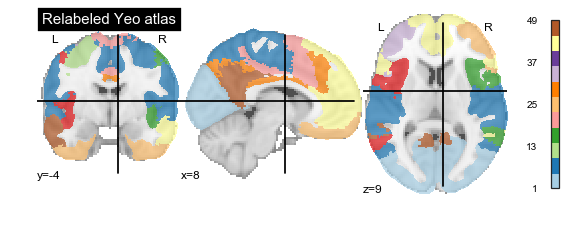

In [94]:
# divide networks into regions, specify connectivity nodes
region_labels = connected_label_regions(atlas_yeo)
plotting.plot_roi(region_labels, title='Relabeled Yeo atlas',
                  cut_coords=(8, -4, 9), colorbar=True, cmap='Paired')

In [95]:
# break brain up into ROIs
#save the new atlas to a nifti file using to_filename method
region_labels.to_filename('relabeled_yeo_atlas.nii.gz')

# Uses

In [99]:
from nilearn import plotting, image
from nilearn.input_data import NiftiLabelsMasker
from nilearn.connectome import ConnectivityMeasure

In [101]:
data = nilearn.datasets.fetch_adhd(n_subjects=10)

/Users/glynismattheisen/anaconda3/lib/python3.6/site-packages/nilearn/datasets/func.py:503: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  dtype=None)


Downloaded 45461055 of 45461055 bytes (100.0%,    0.0s remaining) ...done. (11 seconds, 0 min)
Extracting data from /Users/glynismattheisen/nilearn_data/adhd/62e0c2c19b0720531ba3e51bc3684c0f/adhd40_0010128.tgz..... done.


Downloaded 46216320 of 46216320 bytes (100.0%,    0.0s remaining) ...done. (11 seconds, 0 min)
Extracting data from /Users/glynismattheisen/nilearn_data/adhd/62e0c2c19b0720531ba3e51bc3684c0f/adhd40_0021019.tgz..... done.


Downloaded 20407901 of 20407901 bytes (100.0%,    0.0s remaining) ...done. (11 seconds, 0 min)
Extracting data from /Users/glynismattheisen/nilearn_data/adhd/62e0c2c19b0720531ba3e51bc3684c0f/adhd40_0023008.tgz..... done.


Downloaded 20706939 of 20706939 bytes (100.0%,    0.0s remaining) ...done. (8 seconds, 0 min)
Extracting data from /Users/glynismattheisen/nilearn_data/adhd/62e0c2c19b0720531ba3e51bc3684c0f/adhd40_0023012.tgz..... done.


Downloaded 72402326 of 72402326 bytes (100.0%,    0.0s remaining) ...done. (15 seconds, 0 min)
Extracting data from /Users/glynismattheisen/nilearn_data/adhd/62e0c2c19b0720531ba3e51bc3684c0f/adhd40_0027011.tgz..... done.


Downloaded 76184603 of 76184603 bytes (100.0%,    0.0s remaining) ...done. (15 seconds, 0 min)
Extracting data from /Users/glynismattheisen/nilearn_data/adhd/62e0c2c19b0720531ba3e51bc3684c0f/adhd40_0027018.tgz..... done.


Downloaded 70074120 of 70074120 bytes (100.0%,    0.0s remaining) ...done. (17 seconds, 0 min)
Extracting data from /Users/glynismattheisen/nilearn_data/adhd/62e0c2c19b0720531ba3e51bc3684c0f/adhd40_0027034.tgz..... done.


Downloaded 69291635 of 69291635 bytes (100.0%,    0.0s remaining) ...done. (18 seconds, 0 min)
Extracting data from /Users/glynismattheisen/nilearn_data/adhd/62e0c2c19b0720531ba3e51bc3684c0f/adhd40_0027037.tgz..... done.


/Users/glynismattheisen/anaconda3/lib/python3.6/site-packages/nibabel/nifti1.py:582: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  ext_def = np.fromstring(ext_def, dtype=np.int32)
/Users/glynismattheisen/anaconda3/lib/python3.6/site-packages/nibabel/nifti1.py:582: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  ext_def = np.fromstring(ext_def, dtype=np.int32)
/Users/glynismattheisen/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


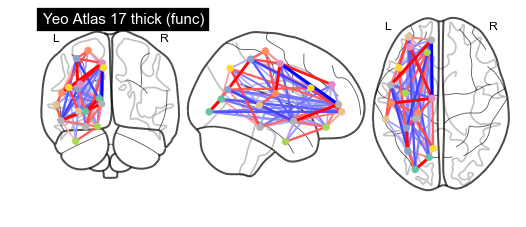

In [119]:
# ConenctivityMeasure from Nilearn uses simple 'correlation' to compute
# connectivity matrices for all subjects in a list
connectome_measure = ConnectivityMeasure(kind='correlation')

# create masker to extract functional data within atlas parcels
masker = NiftiLabelsMasker(labels_img=yeo['thick_17'], standardize=True,
                           memory='nilearn_cache')

# extract time series from all subjects and concatenate them
time_series = []
for func, confounds in zip(data.func, data.confounds):
    time_series.append(masker.fit_transform(func, confounds=confounds))

# calculate correlation matrices across subjects and display
correlation_matrices = connectome_measure.fit_transform(time_series)

# Mean correlation matrix across 10 subjects, using connectome measure object
mean_correlation_matrix = connectome_measure.mean_

# grab center coordinates for atlas labels
coordinates = plotting.find_parcellation_cut_coords(labels_img=yeo['thick_17'])

# plot connectome with 80% edge strength in the connectivity
plotting.plot_connectome(mean_correlation_matrix, coordinates,
                         edge_threshold="50%",
                         title='Yeo Atlas 17 thick (func)')

/Users/glynismattheisen/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


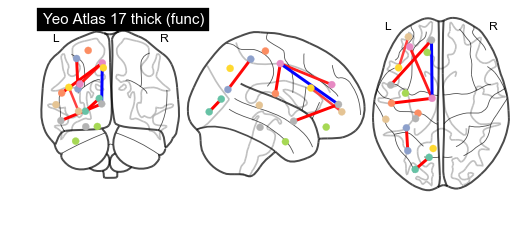

In [105]:
# plot connectome with 80% edge strength in the connectivity
plotting.plot_connectome(mean_correlation_matrix, coordinates,
                         edge_threshold="95%",
                         title='Yeo Atlas 17 thick (func)')

In [593]:
view = plotting.view_img(img2, threshold=0, origin=(98,134,72))
view

/Users/glynismattheisen/anaconda3/lib/python3.6/site-packages/nilearn/image/resampling.py:510: UserWarning: Casting data from int32 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/Users/glynismattheisen/anaconda3/lib/python3.6/site-packages/scipy/ndimage/measurements.py:272: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  return _nd_image.find_objects(input, max_label)
/Users/glynismattheisen/anaconda3/lib/python3.6/site-packages/nilearn/plotting/js_plotting_utils.py:100: UserWarning: It seems you have created more than 10 nilearn views. As each view uses dozens of megabytes of RAM, you might want to delete some of them.
  warnings.warn('It seems you have created more than 10 '


In [590]:
view = plotting.view_img(img, threshold=0, origin=(0,0,0), black_bg=False)
view

/Users/glynismattheisen/anaconda3/lib/python3.6/site-packages/nilearn/image/resampling.py:510: UserWarning: Casting data from int32 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
/Users/glynismattheisen/anaconda3/lib/python3.6/site-packages/scipy/ndimage/measurements.py:272: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  return _nd_image.find_objects(input, max_label)
/Users/glynismattheisen/anaconda3/lib/python3.6/site-packages/nilearn/plotting/js_plotting_utils.py:100: UserWarning: It seems you have created more than 10 nilearn views. As each view uses dozens of megabytes of RAM, you might want to delete some of them.
  warnings.warn('It seems you have created more than 10 '


In [125]:
img_nii = nib.load('/Users/glynismattheisen/nilearn_data/adhd/data/0010042/0010042_rest_tshift_RPI_voreg_mni.nii.gz')

/Users/glynismattheisen/anaconda3/lib/python3.6/site-packages/nibabel/nifti1.py:582: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  ext_def = np.fromstring(ext_def, dtype=np.int32)


In [126]:
img_nii

In [130]:
index_nii = nilearn.image.index_img(img_nii,10)

In [132]:
view = plotting.view_img(index_nii, threshold=0, origin=(0,0,0), black_bg=False)
view

/Users/glynismattheisen/anaconda3/lib/python3.6/site-packages/scipy/ndimage/measurements.py:272: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  return _nd_image.find_objects(input, max_label)
